In [96]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [97]:
anno_dir = "/mnt/data/luftronix/luftr_data/anno_data/annotations"
img_dir = "/mnt/data/luftronix/luftr_data/anno_data/ds_yak_20190416_nau_fuselage"
ann_file = os.path.join(anno_dir, "ds_yak_20190416_nau_fuselage-20190822.json")
coco=COCO(ann_file)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [98]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
rivet other window label drip stitch defect scratch



In [105]:
catIds = coco.getCatIds(catNms=["rivet"]);
imgIds = coco.getImgIds(catIds=catIds);
# imgIds = coco.getImgIds(imgIds = [25])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [106]:
coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])

[{'id': 1132,
  'dataset_id': 11,
  'path': '/datasets/ds_yak_20190416_nau_fuselage/frame_105_2x2+100+100@_0.png',
  'width': 1554,
  'height': 2098,
  'file_name': 'frame_105_2x2+100+100@_0.png'}]

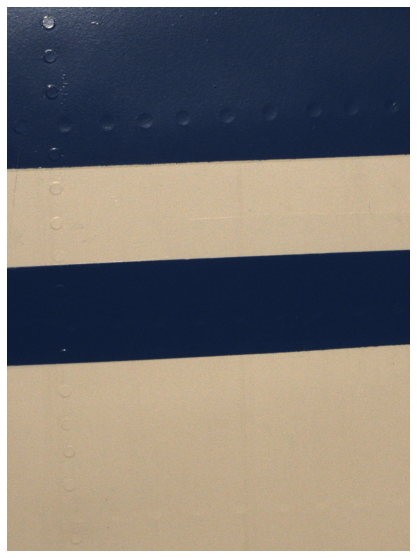

In [107]:
I = io.imread(os.path.join(img_dir, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

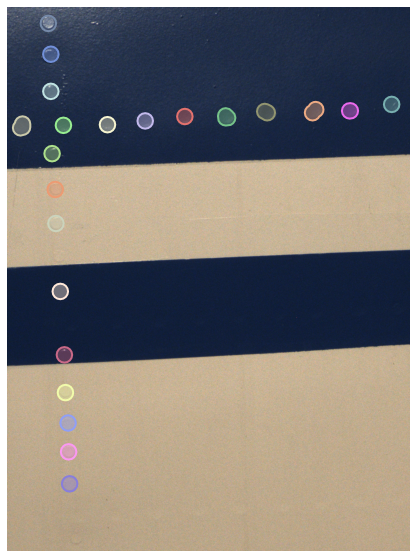

In [108]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [109]:
rivets = []
for i in anns:
    [x,y,w,h] = list(map(int ,i['bbox']))
#     cv2.rectangle(I, (int(x), int(y)), (int(x+w), int(y+h)), (255,0,0), 5)
    rivet = I[y:y + h, x: x + w]
    rivets.append(rivet)

In [110]:
len(rivets)

22

(54, 60, 3)
(60, 60, 3)
(60, 60, 3)
(60, 60, 3)
(60, 60, 3)
(60, 60, 3)
(60, 60, 3)
(90, 73, 3)
(88, 86, 3)
(80, 89, 3)
(69, 83, 3)


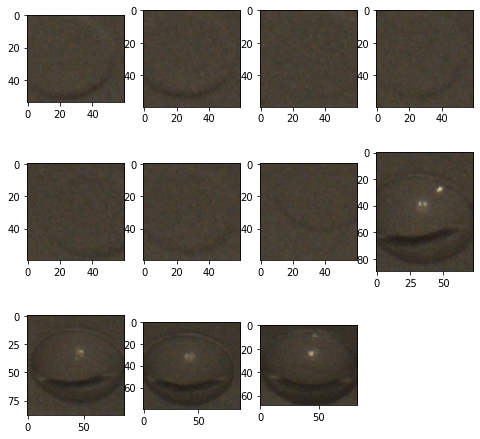

In [95]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 3
for i in range(1, columns*rows):
    img = rivets[i - 1]
    fig.add_subplot(rows, columns, i)
    print(img.shape)
    plt.imshow(img)
plt.show()